# Project: `Marketing Campaign` - Applied Data Science With Python
## Developed by: `Ravi Ranjan Lal`

### **Project Overview :**
This project covers the following processes:
1. #### **Data Cleaning**: Ensuring data quality by handling missing, inconsistent, or incorrect values.
2. #### **Exploratory Data Analysis (EDA)**: Deriving insights and identifying patterns through data visualization.
3. #### **Hypothesis Testing**: Conducting statistical tests to validate assumptions.
4. #### **Feature Engineering**: Transforming and encoding data to optimize it for machine learning models.

# Data Cleaning

In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [2]:
df_main = pd.read_csv("marketing_data.csv")
df_main.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
#check the shape of the dataset , number of rows and columns
df_main.shape

(2240, 28)

In [4]:
# check info of the datset like datatypes in int, object
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# using describe method to check the stats of the datset like, mean, standard deviation , percentile
df_main.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# check how many features have total null values
df_main.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [7]:
# creating a copy of the dataframe, to avoid direct modification on the main datset.
df = df_main.copy()

In [8]:
# drop duplicates if any and check using shape to verify the shape
df.drop_duplicates(subset='ID', inplace=True)
df.shape

(2240, 28)

In [9]:
# check columns for extra spaces
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [10]:
#There is extra space in column name ex- Income column has space before and after the Income column name.
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [11]:
df['Income'].isnull().sum()
# so there are 24 null values in the Income feature.

np.int64(24)

In [12]:
df['Income'].unique()

array(['$84,835.00 ', '$57,091.00 ', '$67,267.00 ', ..., '$46,310.00 ',
       '$65,819.00 ', '$94,871.00 '], shape=(1975,), dtype=object)

In [13]:
# Remove all the $ and comma from the Income feature so that we have all the values converted to float type
df['Income'] = df['Income'].str.strip()
chars_to_remove = ["$", ","]
for item in chars_to_remove:
    df['Income'] = df['Income'].str.replace(item, '')

In [14]:
# Transform the income to numeric from string type
df['Income'] = pd.to_numeric(df['Income'], errors="coerce")

In [15]:
df.head(2) #verify Income column cleaned with $ and , and converted to float

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA


In [16]:
df['Income'].info() #verify Income feature values converted to float

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
2216 non-null   float64
dtypes: float64(1)
memory usage: 17.6 KB


### Problem Statement: Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. 



#### Mean Imputation of Income using Average income of group by Education and Marital_Status. 

In [17]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [18]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [19]:
#Group by Education and Marital_Status to get the average of their income.
mean_income_grp_by = df.groupby(['Education', 'Marital_Status'])['Income'].mean()
print(mean_income_grp_by)

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            53673.944444
            Together          44736.410714
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Absurd            79244.000000
            Alone             34176.000000
            Divorced          54526.042017
            Married           50800.258741
            Single            51322.182927
            Together          55758.480702
            Widow             54976.657143
Master      Absurd            65487.000000
            Alone             61331.000000
            Divorced          50331.945946
            Married           53286.028986
            Single            53530.560000
            Together       

In [20]:
# Apply row wise update using lambda to get the mean from group by, for replacing nan values
df['Income'] = df.apply(
    lambda row: mean_income_grp_by.get((row['Education'], row['Marital_Status']), row['Income']) 
    if pd.isna(row['Income']) else row['Income'], axis=1
)
df['Income'].isnull().sum() #no null values present after the imputation

np.int64(0)

#### Converting date feature to seperate features with day, month and year into numerical, later can be used for model training

In [21]:
df['Dt_Customer'].unique()

array(['6/16/14', '6/15/14', '5/13/14', '5/11/14', '4/8/14', '3/17/14',
       '1/29/14', '1/18/14', '1/11/14', '12/27/13', '12/9/13', '12/7/13',
       '10/16/13', '10/5/13', '9/11/13', '8/1/13', '7/23/13', '7/1/13',
       '5/28/13', '3/26/13', '3/15/13', '2/12/13', '11/23/12', '10/13/12',
       '9/14/12', '6/29/14', '5/31/14', '5/30/14', '4/27/14', '4/11/14',
       '10/29/13', '10/9/13', '5/10/13', '5/9/13', '4/25/13', '4/20/13',
       '3/30/13', '3/1/13', '2/14/13', '1/11/13', '1/3/13', '12/19/12',
       '12/15/12', '12/2/12', '9/17/12', '9/11/12', '5/12/14', '4/28/14',
       '3/29/14', '3/6/14', '3/4/14', '2/4/14', '2/3/14', '1/1/14',
       '12/12/13', '11/15/13', '9/20/13', '9/5/13', '8/31/13', '7/30/13',
       '7/27/13', '6/22/13', '1/5/13', '11/21/12', '11/11/12', '9/28/12',
       '9/27/12', '9/7/12', '8/13/12', '8/11/12', '8/2/12', '6/25/14',
       '5/28/14', '4/14/14', '3/10/14', '2/27/14', '2/7/14', '1/28/14',
       '11/17/13', '11/7/13', '10/17/13', '10/13/13', '1

In [22]:
#Feature engineering : new feature Day Month Year from the feature, Date of Customer Enrolment
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Day_Customer_Enroll'] = df['Dt_Customer'].dt.day
df['Month_Customer_Enroll'] = df['Dt_Customer'].dt.month
df['Year_Customer_Enroll'] = df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)

In [23]:
df.head(2) # verify the 3 new date features updated in the data frame

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,0,1,0,SP,16,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,0,0,1,1,0,CA,15,6,2014


# EDA - Visualization

### Problem Statement : Create variables to populate the total number of children, age, and total spending.

In [24]:
# create feature, total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [25]:
# create feature, age of the customer
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

In [26]:
# create feature, total spending from the amount features (sum of all the amount columns) : row wise sum
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [27]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,1,0,SP,16,6,2014,0,55,1190
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,1,0,CA,15,6,2014,0,64,577
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,US,13,5,2014,1,67,251
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,AUS,11,5,2014,2,58,11
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,1,0,SP,8,4,2014,1,36,91


### Which products are performing the best, and which are performing the least in terms of revenue?

In [28]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_revenue = df[product_columns].sum()
product_revenue_df = product_revenue.reset_index()
product_revenue_df.columns = ['Product', 'Revenue']
product_revenue_df = product_revenue_df.sort_values(by="Revenue", ascending=False)
product_revenue_df

,Product,Revenue
0,MntWines,680816
2,MntMeatProducts,373968
5,MntGoldProds,98609
3,MntFishProducts,84057
4,MntSweetProducts,60621
1,MntFruits,58917


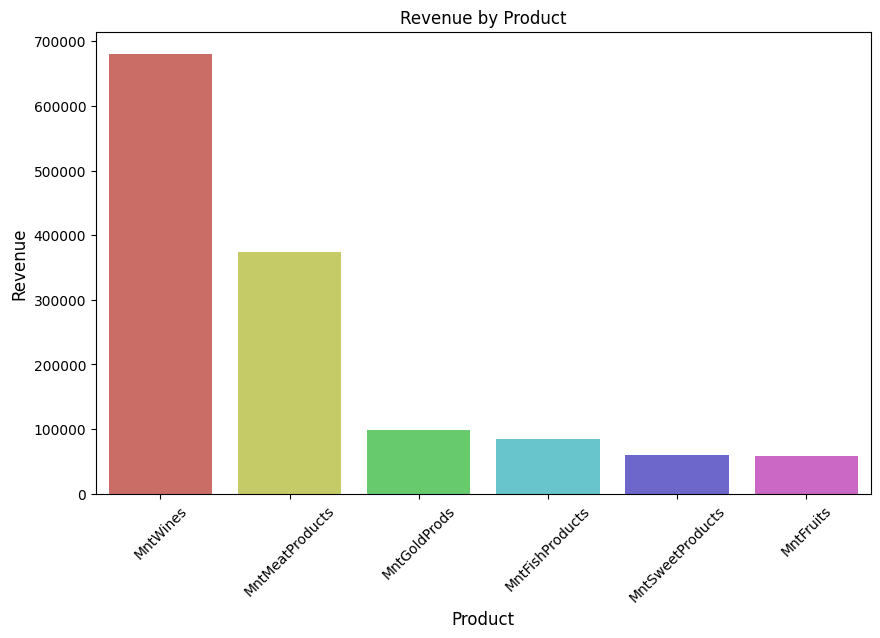

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x="Product", 
            y="Revenue",
            data=product_revenue_df,
            palette='hls',
            hue="Product"
           )
plt.title("Revenue by Product")
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insights
#### Best performing Product is: `Wine` with Reveneu of - `$680816`
#### Least performing Product is: `Fruits` with Reveneu of - `$58917`

### Is there any pattern between the age of customers and the last campaign acceptance rate?

In [30]:
# createing a df Compaign Acceptance Rate, with the mean of Response grouped by Age
df_age_acceptance_rate = df.groupby('Age')['Response'].mean().reset_index()
df_age_acceptance_rate.columns = ['Age', 'Compaign Acceptance Rate']
df_age_acceptance_rate.head()

,Age,Compaign Acceptance Rate
0,29,0.500000
1,30,0.200000
2,31,0.333333
3,32,0.400000
4,33,0.076923


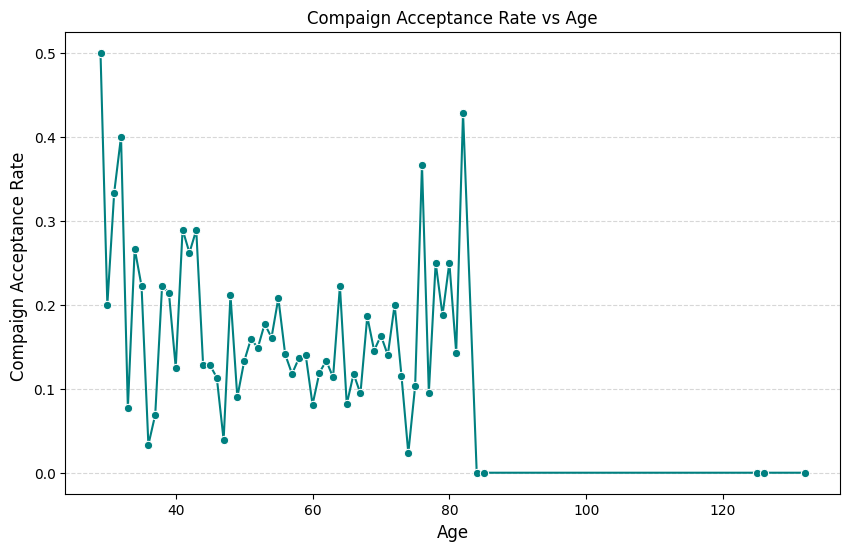

In [31]:
# plotting Compaign Acceptance Rate vs Age
plt.figure(figsize=(10,6))
sns.lineplot(
    x='Age',
    y='Compaign Acceptance Rate',
    data=df_age_acceptance_rate,
    marker="o",
    color="teal",
)
plt.title("Compaign Acceptance Rate vs Age")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Compaign Acceptance Rate ", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.show()

### Insights

#### People under the age group below 30 accepted more offer. People in the age group (15 to 30), mostly children and younger accepted more offer almost 50% on an average. 
#### There is decrease in acceptance of offer in the age group from (40 to 70)
#### There is significant rise in the acceptance of offer from (70 to 80) age group.
#### For the age group above 80, there seems to be no acceptance of offer almost 0%.

### Which Country has the greatest number of customers who accepted the last campaign?

In [32]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [33]:
# creating a df Last Campaign Acceptance, sum of Response grouped by Country
df_country_by_offer_acceptance = df.groupby("Country")['Response'].sum().reset_index()
df_country_by_offer_acceptance.columns = ['Country', "Last Campaign Acceptance"]
df_country_by_offer_acceptance = df_country_by_offer_acceptance.sort_values("Last Campaign Acceptance", ascending=False)
df_country_by_offer_acceptance

,Country,Last Campaign Acceptance
6,SP,176
5,SA,52
1,CA,38
0,AUS,23
2,GER,17
3,IND,13
7,US,13
4,ME,2


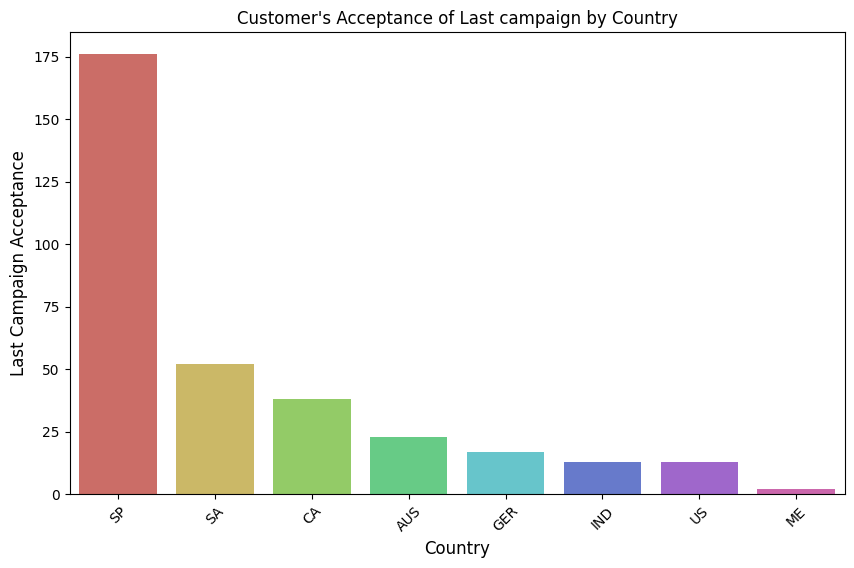

In [34]:
# Plotting Customer's Acceptance of Last campaign by Country
plt.figure(figsize=(10,6))
sns.barplot(
    x="Country",
    y="Last Campaign Acceptance",
    data=df_country_by_offer_acceptance,
    palette="hls",
    hue="Country"
)
plt.title("Customer's Acceptance of Last campaign by Country")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Last Campaign Acceptance", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insight
#### The country, Spain has highest number of customers who accepted the last campaign. 

### Do you see any pattern in the no. of children at home and total spend?

In [35]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,1,0,SP,16,6,2014,0,55,1190
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,1,0,CA,15,6,2014,0,64,577
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,US,13,5,2014,1,67,251
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,AUS,11,5,2014,2,58,11
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,1,0,SP,8,4,2014,1,36,91


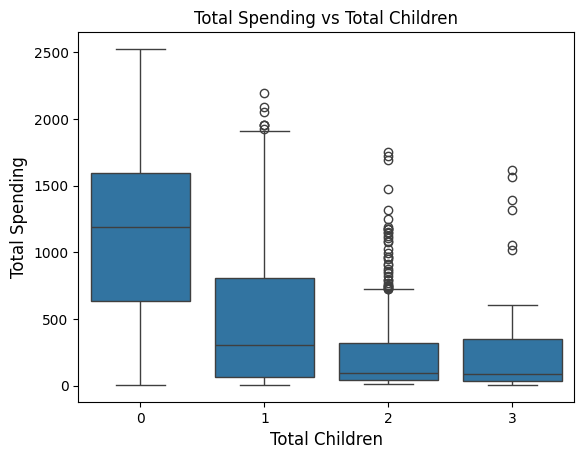

In [36]:
# Plotting Total Spending vs Total Children
plt.title("Total Spending vs Total Children")
sns.boxplot(
    x="Total_Children",
    y="Total_Spending",
    data=df
)
plt.xlabel('Total Children', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.show()

In [37]:
# calculate IQR and finding outliers
q1 = df['Total_Spending'].quantile(0.25)
q3 = df['Total_Spending'].quantile(0.5)
IQR = q3 - q1

lower_bound = q1 - 1.5* IQR
upper_bound = q3 + 1.5 * IQR

outliers = df[(df['Total_Spending'] < lower_bound) | (df['Total_Spending'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")
outliers.shape

Number of Outliers: 708


(708, 33)

### Insights
#### Customers with 0 children : Spending more. The higher IQR shows, that there are significant number of customers spending more.
#### Customers with 1 Child : Spending drops as compared to the customers with 0 children. The IQR shows that significant number of customers spends less than the median spending .
#### Customer with more than 1 children(2,3) : Spending is very less. The IQR shows that there are significantly more customers who tends to spends less with more than 1 children.
#### For Customers with 1,2 and 3 children, there are some outliers with count 708, which suggest that, there are few customers with higher spending having 1 or more kids.

### Education background of the customers who complained in the last 2 years.

In [38]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [39]:
# education_with_complain df, Sum of complain grouped by Education
df_education_with_complain = df.groupby('Education')['Complain'].sum().reset_index()
df_education_with_complain = df_education_with_complain.sort_values("Complain", ascending=False)
df_education_with_complain

,Education,Complain
2,Graduation,14
0,2n Cycle,4
3,Master,2
4,PhD,1
1,Basic,0


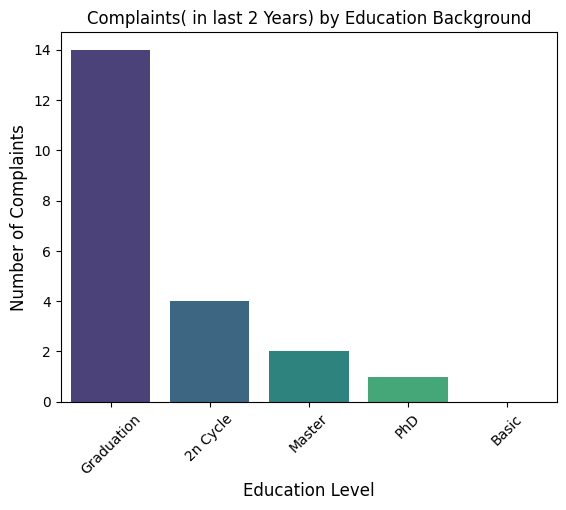

In [40]:
#Plotting Complaints( in last 2 Years) by Education Background
plt.title("Complaints( in last 2 Years) by Education Background")
sns.barplot(
    x='Education',
    y='Complain',
    data=df_education_with_complain,
    palette='viridis',
    hue='Education'
)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Insight
#### Customer who are Graduated have more number of Complaints in last 2 years.
#### This indicates that there are high customer service and support required for people who are Graduated.

# Hypothesis Testing

## 1. Problem Statement: Older people are not as tech-savvy and probably prefer shopping in-store.

#### `Null Hypothesis(H0)` : There is no significant difference in number of store shopping between Younger and Older People
#### `Alternate Hypothesis(H1)` : There is significant difference in number of store shopping between Younger and Older People

In [41]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,1,0,SP,16,6,2014,0,55,1190
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,1,0,CA,15,6,2014,0,64,577


In [42]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Day_Customer_Enroll',
       'Month_Customer_Enroll', 'Year_Customer_Enroll', 'Total_Children',
       'Age', 'Total_Spending'],
      dtype='object')

In [43]:
# Creating a Categorical variable of Age Group with two categories Younger(<45) and Older(>=45)
df['Age_Group'] = df['Age'].apply(lambda x: 'Younger' if x < 45 else 'Older')
df[['Age_Group', 'NumStorePurchases']].head()

,Age_Group,NumStorePurchases
0,Older,6
1,Older,7
2,Older,5
3,Older,2
4,Younger,2


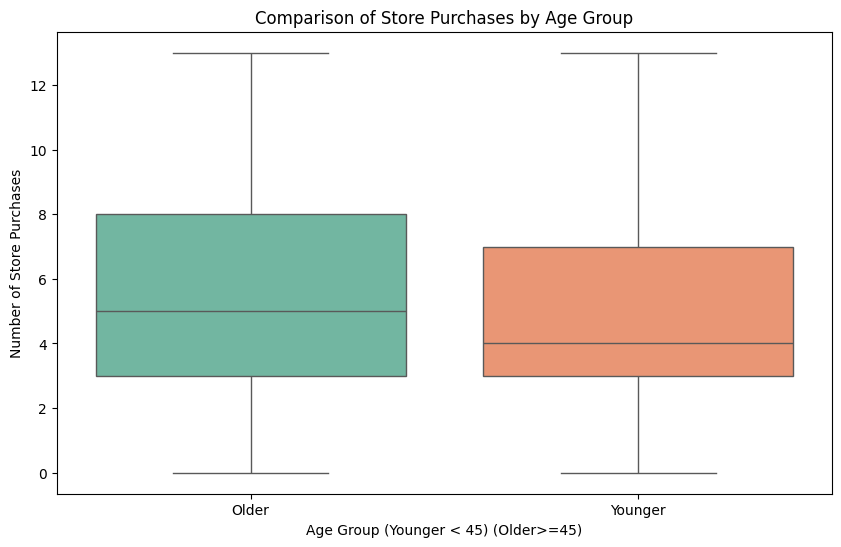

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_Group', y='NumStorePurchases', palette='Set2', hue='Age_Group')
plt.title("Comparison of Store Purchases by Age Group")
plt.xlabel("Age Group (Younger < 45) (Older>=45)")
plt.ylabel("Number of Store Purchases")
plt.show()

### Insights
#### The median in Store purchasing for Older group of customers (>=45) are slightly higher compared to Younger groups. Older customers tends to prefer more In Store Shopping compared to Younger Customers.

### `T-test` to Interpret `Number of Web Purchases` based on `Age Group` : 

In [45]:
from scipy.stats import ttest_ind

In [46]:
# creating two groups with Younger and Older with number of store purchases
younger_grp_df = df[df['Age_Group'] == 'Younger'][['NumStorePurchases']].reset_index(drop=True)
older_grp_df = df[df['Age_Group'] == 'Older'][['NumStorePurchases']].reset_index(drop=True)
print(younger_grp_df.head())
print(older_grp_df.head())

   NumStorePurchases
0                  2
1                  2
2                  9
3                  3
4                  4
   NumStorePurchases
0                  6
1                  7
2                  5
3                  2
4                  5


In [47]:
#independent t-test
t_stat, p_value = ttest_ind(younger_grp_df, older_grp_df)

print(f"T-statistic: {t_stat[0]:.4f}")
print(f"P-Value: {p_value[0]:.4f}")

#set alpha
alpha = 0.05
if(p_value < alpha):
    print("Rejecting Null Hypothesis : There is significant difference in number of store shopping between Younger and Older People.")
else :
    print("Failed to Reject Null Hypothesis: There is no significant difference in number of store shopping between Younger and Older People.")

T-statistic: -3.4229
P-Value: 0.0006
Rejecting Null Hypothesis : There is significant difference in number of store shopping between Younger and Older People.


### Conclusion / Observation
#### T-Test result indicates significant difference in number of store shopping by age group.
#### Based on both visual and statistical analysis, older people tends to shop more in store and is not more tech savy.

## 2. Problem Statement : Customers with kids probably have less time to visit a store and would prefer to shop online.
#### `Null Hypothesis(H0)` : There is **no significant difference** in number of web purchases between Customer with kids and those without kids.
#### `Alternate Hypothesis(H1)` : There is **significant difference** in number of web purchases between Customer with kids and those without kids.

In [48]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,1,0,SP,16,6,2014,0,55,1190,Older
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,0,CA,15,6,2014,0,64,577,Older
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,US,13,5,2014,1,67,251,Older
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,AUS,11,5,2014,2,58,11,Older
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,1,0,SP,8,4,2014,1,36,91,Younger


In [49]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Day_Customer_Enroll',
       'Month_Customer_Enroll', 'Year_Customer_Enroll', 'Total_Children',
       'Age', 'Total_Spending', 'Age_Group'],
      dtype='object')

In [50]:
#create a df with Kids_Group with two variables
df['Kids_Group'] = df['Total_Children'].apply(lambda x: 'With_Kids' if x > 0 else 'Without_Kids')

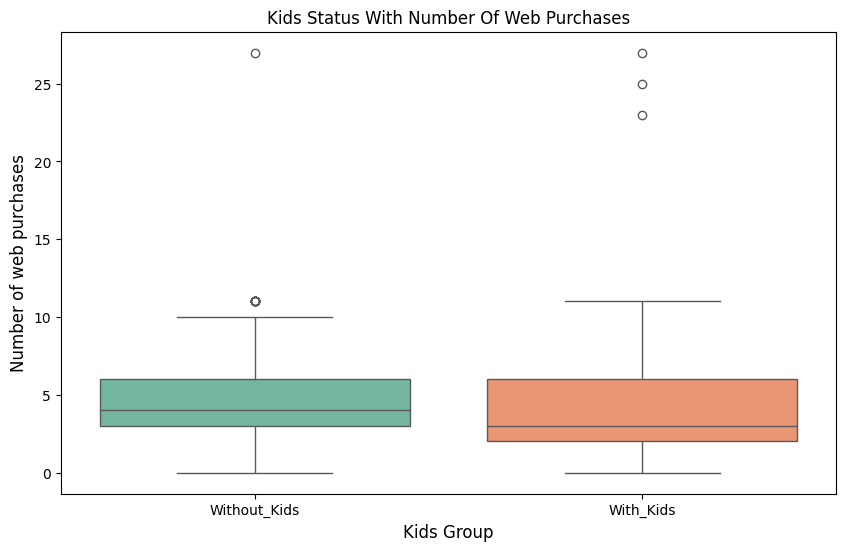

In [51]:
#Plotting Kids Status With Number Of Web Purchases
plt.figure(figsize=(10,6))
sns.boxplot(x='Kids_Group', y='NumWebPurchases', data=df, palette='Set2', hue="Kids_Group")
plt.xlabel("Kids Group", fontsize=12)
plt.ylabel("Number of web purchases", fontsize=12)
plt.title("Kids Status With Number Of Web Purchases")
plt.show()

### Insights
#### The median number of purchases for Customer without kids seems bit higher as compared to customers with kids but there is no significant difference in the median of both the groups.
#### The IQR shows high variablity for Customers with kids as compared to without kids demontrating more prefrence for online purchase.
#### There are few outliers which suggest extreme number of online shopping for few customers having kids.

### `T-Test` to interpret `Number of Web Purchases` based on `Kids Group`

In [52]:
from scipy.stats import ttest_ind

In [53]:
#Creating two groups with and without kids based on number of web purchases
number_web_purchase_with_kids = df[df['Total_Children'] > 0][['NumWebPurchases']].reset_index(drop=True)
number_web_purchase_without_kids = df[df['Total_Children'] == 0][['NumWebPurchases']].reset_index(drop=True)

In [54]:
# t-test stats for hypothesis
t_stat, p_value = ttest_ind(number_web_purchase_with_kids, number_web_purchase_without_kids, equal_var=False)

print(f"T-statistic: {t_stat[0]:.4f}")
print(f"P-Value: {p_value[0]:.4f}")

alpha = 0.5
if(p_value < alpha):
    print("Rejecting Null Hypothesis : There is significant difference in number of web purchases for customers having kids with those not having kids.")
else :
    print("Failed to Reject Null Hypothesis: There is no significant difference in number of web purchases for customers having kids with those not having kids.")

T-statistic: -3.5419
P-Value: 0.0004
Rejecting Null Hypothesis : There is significant difference in number of web purchases for customers having kids with those not having kids.


### Conclusion / Observation
#### T-Test result indicates significant difference in number of web purchases for Customer with and without kids.
#### Based on both visual and statistical analysis, customers with kids have probably less time visiting store and prefer more online shopping.
#### The median number of web purchases for Customer without kids are slightly high, but the customers with kids demonstrate online shoppping behaviour.

## 3. Problem Statement : Other distribution channels may cannibalize sales at the store.
#### `Null Hypothesis(H0)` : The avergae purchases of all the channels are similar.
#### `Alternate Hypothesis(H1)` : The average purchases of one of the channel is different.

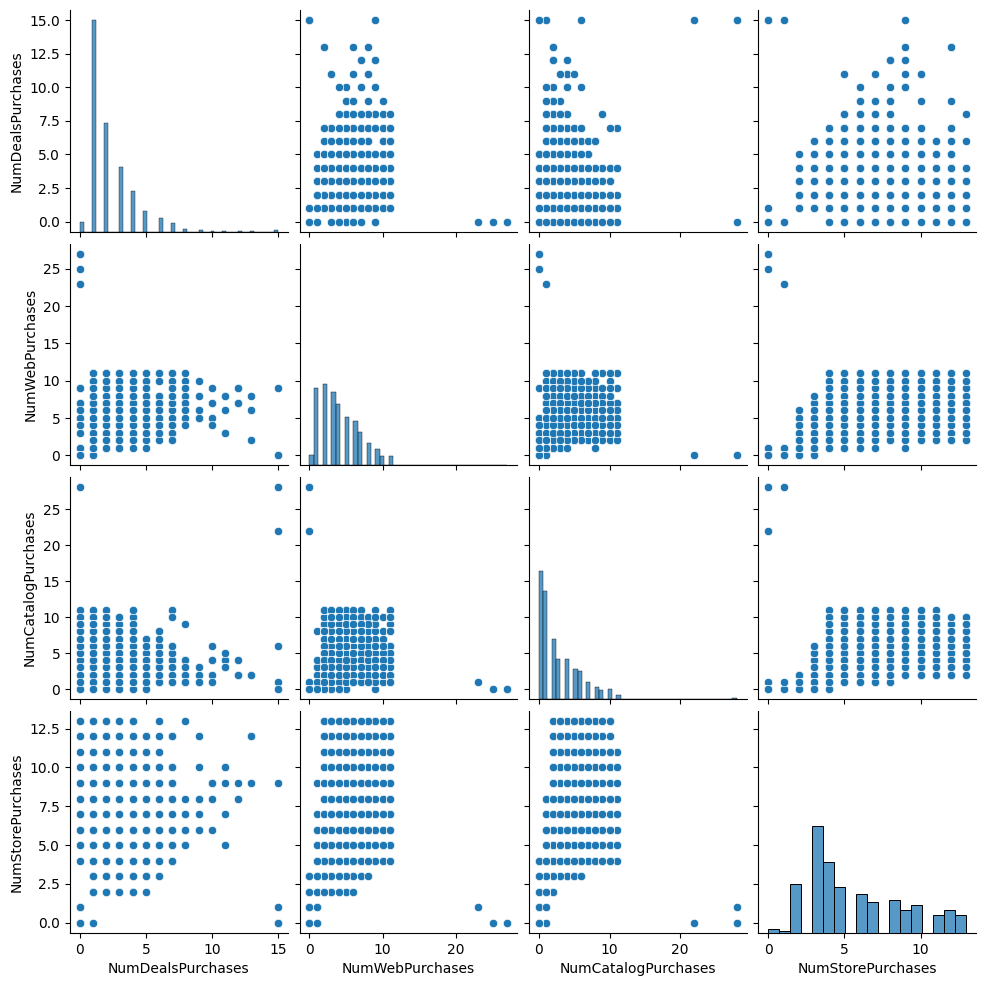

In [55]:
# Visualization: "Pair plot for all the distribution channel"
sns.pairplot(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
plt.show()

### Insights
#### The Historgram along the diagonal, for Number of Store purchases suggest, there are more number of purchases clusterd around 2 to 5 purchases. While there is some skewness when the there are more than 10 purchases, indicating fewer people making large number of purchases in store.
#### The Scatterplot , Number of Store vs Number of Deals Purchases indicates that there are more number of store purchases when there are more deals. 
#### Number of Store vs Number of Web purchases does not show any correlation between them. This suggests that in store purchase and web purchases customers are different.
#### Number of Store vs Number of Catelogue purchases does not show any correlation between them. This suggests there are completely different customers preferring on or the other


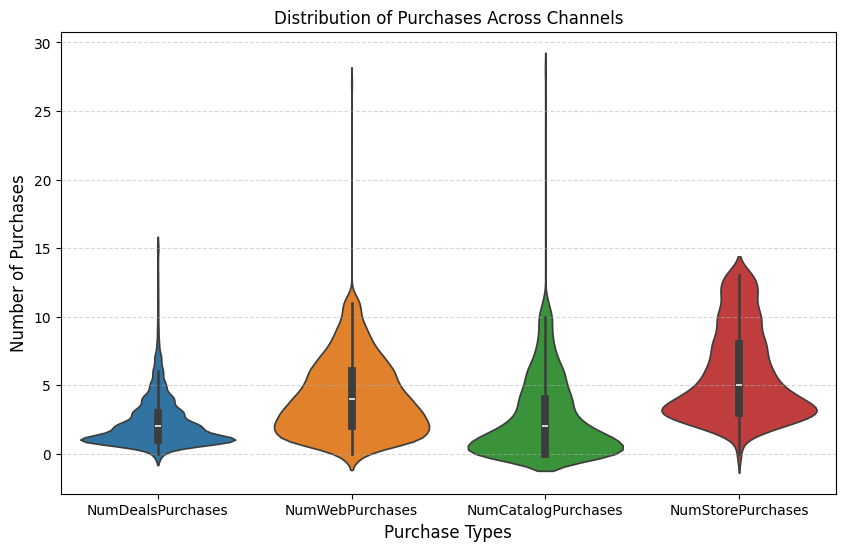

In [56]:
# Visualization: "Pair plot for all the distribution channel"
plt.figure(figsize=(10,6))
plt.title("Distribution of Purchases Across Channels")
sns.violinplot(df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.xlabel("Purchase Types", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.show()

### Insights
#### The Number of Store purchases from the Violin plot seems more consistent and preferred mode of purchases.
#### The median for Number of Store purchase suggest, there are more pople prefrring byuing in store compared to other channels.
#### The distrubution suggest most number of purchases (2 to 5) are in store as compared to other channels.

### `One-Way Anova Test` to interpret Variability in Distrubution Channels

In [57]:
import pandas as pd
from scipy.stats import f_oneway

deals_purchases = df['NumDealsPurchases']
web_purchases = df['NumWebPurchases']
catalog_purchases = df['NumCatalogPurchases']
store_purchases = df['NumStorePurchases']

# one way anova test for all the ditribution channels
anova_result = f_oneway(deals_purchases, web_purchases, catalog_purchases, store_purchases)

print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Hypothesis Test
if anova_result.pvalue < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
    print("There is a significant difference in the means of at least one distribution channel.")
else:
    print("The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("There is no significant difference in the means of the distribution channels.")


ANOVA F-statistic: 731.2212807584392
ANOVA p-value: 0.0
The p-value is less than 0.05. We reject the null hypothesis.
There is a significant difference in the means of at least one distribution channel.


In [58]:
from scipy.stats import f_oneway

In [59]:
anova_f_stats, p_value = f_oneway(df['NumDealsPurchases'],
                                  df['NumWebPurchases'], 
                                  df['NumCatalogPurchases'],
                                  df['NumStorePurchases'])
print(f"ANOVA F Stats: {anova_f_stats}")
print(f"ANOVA P value: {p_value}")

alpha = 0.5
if p_value < alpha:
    print("Rejecting Null Hypothesis : The average purchase of all the distribution channels are not similar.")
else :
    print("Failed to Reject Null Hypothesis: The average purchase of all the distribution channels are similar.")

ANOVA F Stats: 731.2212807584392
ANOVA P value: 0.0
Rejecting Null Hypothesis : The average purchase of all the distribution channels are not similar.


### Conclusion / Observation
#### One-Way Anova result indicates significant difference in means of distribution channels. There may be chances of one or more distribution channels significantly being high.
#### The Visualization analysis indicates that In Store Purchase are higher as compared to other channels.
#### While visualization indicates higher Store purchases, Anova stats indicates variablity in purchases accross channels. Further investigation is needed to confirm the role of other channels cannabalizing the In Store Purchases

## 4. Problem Statement : Does the US fare significantly better than the rest of the world in terms of total purchases?.
#### `Null Hypothesis(H0)` : The mean total purchases of US is equal to the mean of rest of the countries.
#### `Alternate Hypothesis(H1)` : The mean total purchases of US is not equal to the mean spending of rest of the countries.

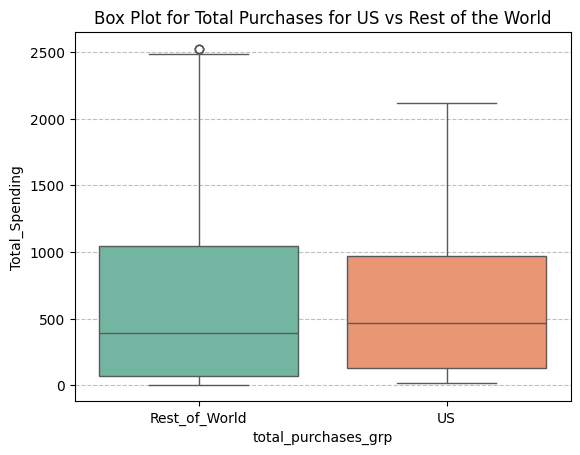

In [60]:
# creating a column for total purchase grouped by US and Rest of the world
df['total_purchases_grp'] = df['Country'].apply(lambda x : 'US' if x == 'US' else 'Rest_of_World').reset_index(drop=True)

# bos plot for Total Purchases for US vs Rest of the World
plt.title("Box Plot for Total Purchases for US vs Rest of the World")
sns.boxplot(x='total_purchases_grp', y='Total_Spending', data=df, palette='Set2', hue='total_purchases_grp')
plt.grid(axis='y', linestyle="--", alpha=0.8)
plt.show()

### Insights

#### Median Spending : The median purchases for US is slightly higher around `$500` as compared to Rest of the World.
#### Spending Variability : The variablity in the Rest of the world suggest, spending behaviour varies slight widely in Rest of the world as compared to US.
#### The spending of US has lower variablity as compared to the Rest of the World but the overall spending pattern is similar.
#### There are outliers in Rest of the world that suggest , the some regions contribute to higher spendings around $2500.


### Independent T-Stat Test to interpret Total Purchases for US and Rest of World

In [61]:
US_total_spending = df[df['Country'] == 'US']['Total_Spending']
rest_of_world_spending = df[df['Country'] != 'US']['Total_Spending']

In [62]:
from scipy.stats import ttest_ind

In [63]:
# t stat for Hypothesis Test for US vs rest of the world
t_stats, p_value = ttest_ind(US_total_spending, rest_of_world_spending)

print(f"T-statistics: {t_stat[0]:.4f}")
print(f"P Value: {p_value:.4f}")

alpha = 0.05
if(p_value < alpha):
    print("Rejecting Null Hypothesis : The mean of US vs Rest of the world are significantly different.")
else :
    print("Failed to Reject Null Hypothesis: There is no significant difference in mean of US vs Rest of the world")

T-statistics: -3.5419
P Value: 0.7630
Failed to Reject Null Hypothesis: There is no significant difference in mean of US vs Rest of the world


### Obeservations / Conclusions
#### The T-statistics and Visual analysis suggest there is no significant difference in the mean spending of US as compared to Rest of the world.
#### While the US spending variablity is slightly lower , the overall spending pattern is similar.

# Feature Engineering : (Data Encoding, Normalization/Standardization)

## Encoding
#### Encoding is performed after visualization and hypothesis testing to ensure that the categorical variables remain intact and relevant for Visualization and Hypothesis.
#### Encoding ensures that the categorcial features are transfomed to numeric for machine learning as, machines can only process numerical data for training.

#### Encoding to be perfomed for Categorical variables : `Education` , `Marital_Status`, `Country`
#### **`NOTE`** : We will drop the features `Age_Group`, `Kids_Group`, and `total_purchases_grp` as these were created for the purpose of analysis from the raw data and the relevant information alread exist in the raw features.

In [64]:
# Dropping Age_Group, Kids_Group, and total_purchases_grp
columns_to_drop = ['Age_Group', 'Kids_Group', 'total_purchases_grp']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,1,0,SP,16,6,2014,0,55,1190
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,1,0,CA,15,6,2014,0,64,577


#### **`Ordinal Encoding`** for Education Feature

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_Birth             2240 non-null   int64  
 2   Education              2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2240 non-null   float64
 5   Kidhome                2240 non-null   int64  
 6   Teenhome               2240 non-null   int64  
 7   Recency                2240 non-null   int64  
 8   MntWines               2240 non-null   int64  
 9   MntFruits              2240 non-null   int64  
 10  MntMeatProducts        2240 non-null   int64  
 11  MntFishProducts        2240 non-null   int64  
 12  MntSweetProducts       2240 non-null   int64  
 13  MntGoldProds           2240 non-null   int64  
 14  NumDealsPurchases      2240 non-null   int64  
 15  NumW

In [66]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [67]:
from sklearn.preprocessing import OrdinalEncoder

In [68]:
categories = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
# create an instance of OrdinalEncoder and 
ordinal_encoder_education = OrdinalEncoder(categories=[categories])

# applying fit_transform
df['Education_Encoded'] = ordinal_encoder_education.fit_transform(df[['Education']])

#drop the education categorical feature
df.drop('Education', axis=1, inplace=True)

# encoded unique values
df['Education_Encoded'].unique()

array([2., 4., 1., 3., 0.])

In [69]:
# Education_encoded feature added to dataset
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Complain,Country,Day_Customer_Enroll,Month_Customer_Enroll,Year_Customer_Enroll,Total_Children,Age,Total_Spending,Education_Encoded
0,1826,1970,Divorced,84835.0,0,0,0,189,104,379,...,1,0,SP,16,6,2014,0,55,1190,2.0
1,1,1961,Single,57091.0,0,0,0,464,5,64,...,1,0,CA,15,6,2014,0,64,577,2.0
2,10476,1958,Married,67267.0,0,1,0,134,11,59,...,0,0,US,13,5,2014,1,67,251,2.0
3,1386,1967,Together,32474.0,1,1,0,10,0,1,...,0,0,AUS,11,5,2014,2,58,11,2.0
4,5371,1989,Single,21474.0,1,0,0,6,16,24,...,1,0,SP,8,4,2014,1,36,91,2.0


In [70]:
# verify the uniue transformed data for each categories
# suppressing the warning. The below code is just for demonstrating the encoded value we got for each education category
warnings.filterwarnings("ignore", category=UserWarning)

for categ in categories:
    encoded_value = ordinal_encoder_education.transform([[categ]])
    print(f"{categ}: {encoded_value[0][0]}")

Basic: 0.0
2n Cycle: 1.0
Graduation: 2.0
Master: 3.0
PhD: 4.0


#### **`One Hot Encoding`** for Country

In [71]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
#create an instance of One Hot Encoder
encoder = OneHotEncoder()
# fit and transform 'Country' column into one-hot encoded array
country_encoded = encoder.fit_transform(df[['Country']]).toarray()
country_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(2240, 8))

In [74]:
#convert each encoded columns into data frame with each country features
encoded_country_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out())
encoded_country_df.head(5)

,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
#merge the original data with the enocded columns
df = pd.concat([df, encoded_country_df], axis=1)
#drop the categorical feature 'Country' after the encoded country features merged
df.drop('Country', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Total_Spending,Education_Encoded,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,Divorced,84835.0,0,0,0,189,104,379,...,1190,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,Single,57091.0,0,0,0,464,5,64,...,577,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10476,1958,Married,67267.0,0,1,0,134,11,59,...,251,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1386,1967,Together,32474.0,1,1,0,10,0,1,...,11,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,Single,21474.0,1,0,0,6,16,24,...,91,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### **`Target Guided Ordinal encoding`** for Marital Status
#### `Target Guided Ordinal encoding` is a technique used to encode categorical variables based on their relationship with the target variable.

#### In Target Guided Ordinal Encoding, we `replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category`. This creates a monotonic relationship between the categorical variable and the target variable, which can improve our model's predication.

#### Here in the dataset we will `perform the Target Guided Ordinal Encoding with the categorical Variable 'Marital Status' and Target Variable 'Total_Spending'`. We will get the mean of the 'Total Spending' for the group of 'Marital Status'. This will ensure a better model predication where the relationship of this 'Marital Status' category and Total Spending is retained.

In [76]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [77]:
# mean of total spending grouped by marital status
mean_spending = df.groupby('Marital_Status')['Total_Spending'].mean().round(4)
mean_spending

Marital_Status
Absurd      1192.5000
Alone        256.6667
Divorced     610.6293
Married      590.8021
Single       606.4833
Together     608.3879
Widow        738.8182
YOLO         424.0000
Name: Total_Spending, dtype: float64

In [78]:
# Marital Status encoded feature with mean of each group
df['Marital_Status_Encoded'] = df['Marital_Status'].map(mean_spending)

#dropping categorical feature Marital_Status after encoding
df.drop('Marital_Status', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Encoded,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Marital_Status_Encoded
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,610.6293
1,1,1961,57091.0,0,0,0,464,5,64,7,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.4833
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,590.8021
3,1386,1967,32474.0,1,1,0,10,0,1,0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,608.3879
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,606.4833


In [79]:
# All the categorical features encoded into numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      2240 non-null   int64  
 1   Year_Birth              2240 non-null   int64  
 2   Income                  2240 non-null   float64
 3   Kidhome                 2240 non-null   int64  
 4   Teenhome                2240 non-null   int64  
 5   Recency                 2240 non-null   int64  
 6   MntWines                2240 non-null   int64  
 7   MntFruits               2240 non-null   int64  
 8   MntMeatProducts         2240 non-null   int64  
 9   MntFishProducts         2240 non-null   int64  
 10  MntSweetProducts        2240 non-null   int64  
 11  MntGoldProds            2240 non-null   int64  
 12  NumDealsPurchases       2240 non-null   int64  
 13  NumWebPurchases         2240 non-null   int64  
 14  NumCatalogPurchases     2240 non-null   

### Normalization / Standardization

#### **`Normalization for Income`** : Performing normalization for Income feature, as Income is expected to have bounded range and would follow normal ditribution with less variance. `Normalization will scale the values to range [0 to 1]`

#### **`Standardization for Total Spending and Amount spent on items`**: The features, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds and Total Spending may vary widely and would not follow a normal ditribution so Standardization here centers the ditribution around their mean`(mean of 0)` and scales them to unit variance`(standard deviation of 1)`, ensuring consistency.

#### Normalization : Income Feature

In [80]:
df[['Income']].head()

,Income
0,84835.0
1,57091.0
2,67267.0
3,32474.0
4,21474.0


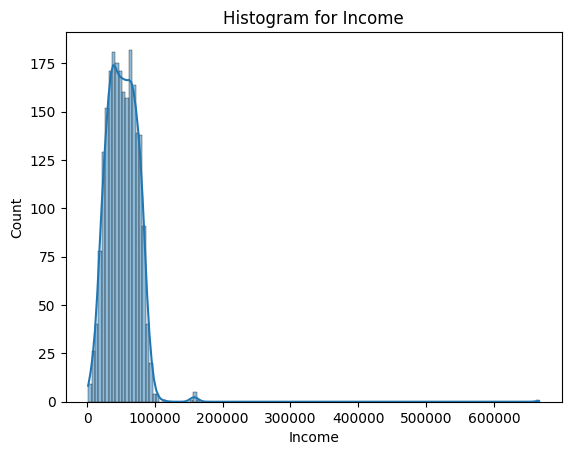

In [81]:
# Plotting Histogram of Income shows bell curve with slightly postive skewed
plt.title("Histogram for Income")
sns.histplot(data=df, x='Income', kde=True)
plt.show()

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
# initializae MinMaxScaler
scaler = MinMaxScaler()

#Normalize income fe and add it to the datframe
df['Income_Normalized'] = scaler.fit_transform(df[['Income']]).round(4)

#dropping original income feature
df.drop('Income', axis=1, inplace=True)
df.head()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Marital_Status_Encoded,Income_Normalized
0,1826,1970,0,0,0,189,104,379,111,189,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,610.6293,0.1250
1,1,1961,0,0,0,464,5,64,7,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.4833,0.0833
2,10476,1958,0,1,0,134,11,59,15,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,590.8021,0.0986
3,1386,1967,1,1,0,10,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,608.3879,0.0462
4,5371,1989,1,0,0,6,16,24,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,606.4833,0.0297


#### Standardization : Total Spending and Amount Spent on Items Features

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
columns_to_standardize = ['Total_Spending', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

#initialize Standard scaler
scaler = StandardScaler()

#standardize columns
standardized_data = scaler.fit_transform(df[columns_to_standardize]).round(4)
standardized_df = pd.DataFrame(standardized_data, columns=[f"{col}_Standardized" for col in columns_to_standardize])
standardized_df.head()

,Total_Spending_Standardized,MntWines_Standardized,MntFruits_Standardized,MntMeatProducts_Standardized,MntFishProducts_Standardized,MntSweetProducts_Standardized,MntGoldProds_Standardized
0,0.9702,-0.3415,1.9539,0.9397,1.3453,3.9237,3.3357
1,-0.0478,0.4756,-0.5357,-0.4562,-0.5589,-0.6557,-0.1346
2,-0.5893,-0.5050,-0.3848,-0.4784,-0.4124,-0.6073,-0.2688
3,-0.9878,-0.8735,-0.6614,-0.7354,-0.6871,-0.6557,-0.8440
4,-0.8550,-0.8853,-0.2591,-0.6335,-0.4857,-0.6557,-0.1922


In [86]:
#add new standardized df to the original df
df = pd.concat([df, standardized_df], axis=1)
# drop original items spending features
df.drop(columns=columns_to_standardize, inplace=True)
df.head()

,ID,Year_Birth,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,Country_US,Marital_Status_Encoded,Income_Normalized,Total_Spending_Standardized,MntWines_Standardized,MntFruits_Standardized,MntMeatProducts_Standardized,MntFishProducts_Standardized,MntSweetProducts_Standardized,MntGoldProds_Standardized
0,1826,1970,0,0,0,1,4,4,6,1,...,0.0,610.6293,0.1250,0.9702,-0.3415,1.9539,0.9397,1.3453,3.9237,3.3357
1,1,1961,0,0,0,1,7,3,7,5,...,0.0,606.4833,0.0833,-0.0478,0.4756,-0.5357,-0.4562,-0.5589,-0.6557,-0.1346
2,10476,1958,0,1,0,1,3,2,5,2,...,1.0,590.8021,0.0986,-0.5893,-0.5050,-0.3848,-0.4784,-0.4124,-0.6073,-0.2688
3,1386,1967,1,1,0,1,1,0,2,7,...,0.0,608.3879,0.0462,-0.9878,-0.8735,-0.6614,-0.7354,-0.6871,-0.6557,-0.8440
4,5371,1989,1,0,0,2,3,1,2,7,...,0.0,606.4833,0.0297,-0.8550,-0.8853,-0.2591,-0.6335,-0.4857,-0.6557,-0.1922


#### Note: Perfoming `Standardization` on feature **`Marital_Status_Encoded`** as the Encoded mean value for Marital_Status is large and would affect the perormance during model training

In [87]:
scaler = StandardScaler()
df['Marital_Status_Standardized'] = scaler.fit_transform(df[['Marital_Status_Encoded']]).round(4)
df.drop(columns=['Marital_Status_Encoded'], axis=1, inplace=True)
df.head()

,ID,Year_Birth,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,Country_US,Income_Normalized,Total_Spending_Standardized,MntWines_Standardized,MntFruits_Standardized,MntMeatProducts_Standardized,MntFishProducts_Standardized,MntSweetProducts_Standardized,MntGoldProds_Standardized,Marital_Status_Standardized
0,1826,1970,0,0,0,1,4,4,6,1,...,0.0,0.1250,0.9702,-0.3415,1.9539,0.9397,1.3453,3.9237,3.3357,0.1395
1,1,1961,0,0,0,1,7,3,7,5,...,0.0,0.0833,-0.0478,0.4756,-0.5357,-0.4562,-0.5589,-0.6557,-0.1346,0.0198
2,10476,1958,0,1,0,1,3,2,5,2,...,1.0,0.0986,-0.5893,-0.5050,-0.3848,-0.4784,-0.4124,-0.6073,-0.2688,-0.4330
3,1386,1967,1,1,0,1,1,0,2,7,...,0.0,0.0462,-0.9878,-0.8735,-0.6614,-0.7354,-0.6871,-0.6557,-0.8440,0.0748
4,5371,1989,1,0,0,2,3,1,2,7,...,0.0,0.0297,-0.8550,-0.8853,-0.2591,-0.6335,-0.4857,-0.6557,-0.1922,0.0198


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             2240 non-null   int64  
 1   Year_Birth                     2240 non-null   int64  
 2   Kidhome                        2240 non-null   int64  
 3   Teenhome                       2240 non-null   int64  
 4   Recency                        2240 non-null   int64  
 5   NumDealsPurchases              2240 non-null   int64  
 6   NumWebPurchases                2240 non-null   int64  
 7   NumCatalogPurchases            2240 non-null   int64  
 8   NumStorePurchases              2240 non-null   int64  
 9   NumWebVisitsMonth              2240 non-null   int64  
 10  AcceptedCmp3                   2240 non-null   int64  
 11  AcceptedCmp4                   2240 non-null   int64  
 12  AcceptedCmp5                   2240 non-null   i

In [90]:
# Saving the final dataset after Cleaning, Feature Engineering(Encoding, Normalizing and Standardizing)
# the relvant features for model training

#  Save file in csv
df.to_csv('marketing_data_final.csv', index=False)

# Save file in pickle(pkl) for faster loading in python for model training
df.to_pickle('marketing_data_final.pkl')

print("File saved successfully")

File saved successfully
